In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Viism\OneDrive\Documents\Python Scripts\churn_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df_new = df.drop(columns =['Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Population', 'CaseOrder', 'Zip', 'Lat', 
                           'Lng', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Age',
                           'Job', 'Outage_sec_perweek', 'Email', 'Yearly_equip_failure', 'Port_modem', 'Tablet', 'InternetService', 'Churn', 'Marital', 'Gender', 'Techie', 'Contract', 'Contacts',
                           'Phone', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [5]:
df_new.head()

,Children,Income
0,0,28561.99
1,1,21704.77
2,4,9609.57
3,1,18925.23
4,0,40074.19


In [6]:
df_new.shape

(10000, 2)

In [7]:
arr = df_new.to_numpy()
 
print('Numpy Array', arr)
print('Numpy Array Datatype :', arr.dtype)

Numpy Array [[0.000000e+00 2.856199e+04]
 [1.000000e+00 2.170477e+04]
 [4.000000e+00 9.609570e+03]
 ...
 [1.000000e+00 4.598343e+04]
 [1.000000e+00 1.666758e+04]
 [1.000000e+00 9.020920e+03]]
Numpy Array Datatype : float64


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
Scaler = StandardScaler()
KMeans = KMeans(n_clusters=3)

In [9]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(arr)
df_scaled = pd.DataFrame(df_scaled, columns=['Children', 'Income'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,Children,Income
0,-0.972338,-0.398778
1,-0.506592,-0.641954
2,0.890646,-1.070885
3,-0.506592,-0.740525
4,-0.972338,0.009478


In [10]:
df_scaled.to_csv("C:/Users/Viism/Downloads/D212 task-1.csv")

In [11]:
import seaborn as sns

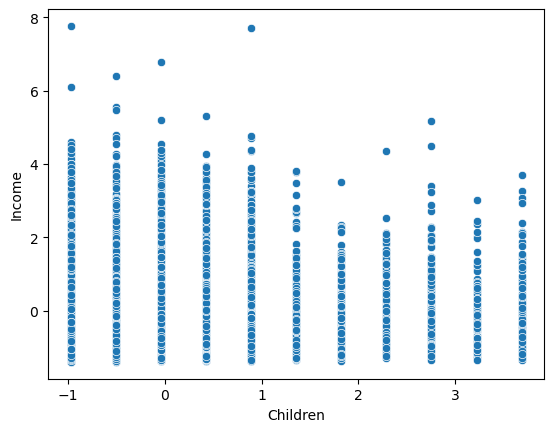

In [12]:
ax = sns.scatterplot(data = df_scaled,
                     x = 'Children',
                     y = 'Income')

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

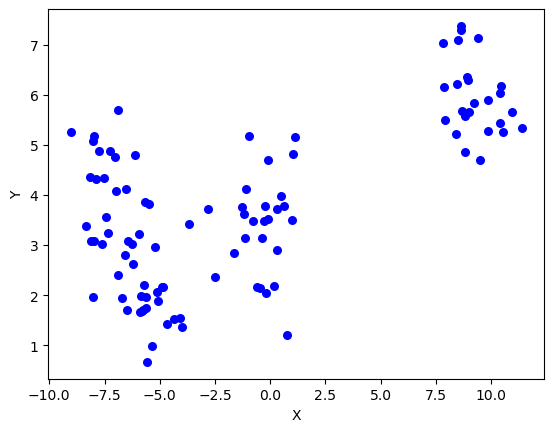

<Figure size 640x480 with 0 Axes>

In [15]:


# make_blobs() is used to generate sample points
# around c centers (randomly chosen)
X, y = make_blobs(n_samples = 100, centers = 4, 
cluster_std = 1, n_features = 2)
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b')

# label the axes
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.clf() # clear the figure


In [16]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [17]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 5.754726040092934
2 : 2.5771752176518445
3 : 1.4001723412361746
4 : 1.096161993731885
5 : 1.002916757124577
6 : 0.9462875703636096
7 : 0.8517447833869936
8 : 0.8061809236431473
9 : 0.74550922790188


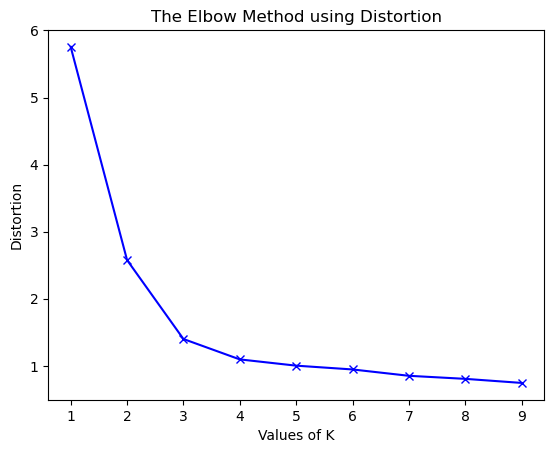

In [18]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

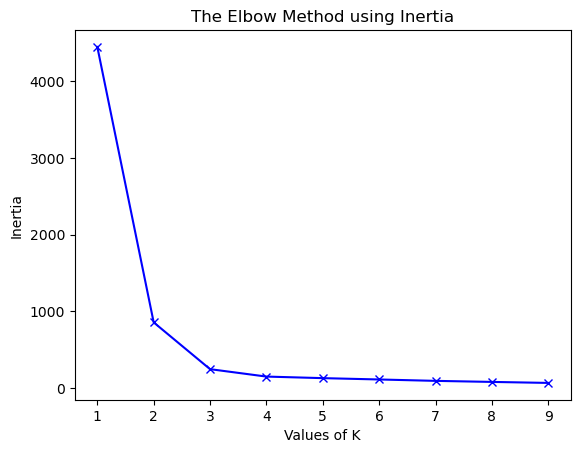

In [19]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


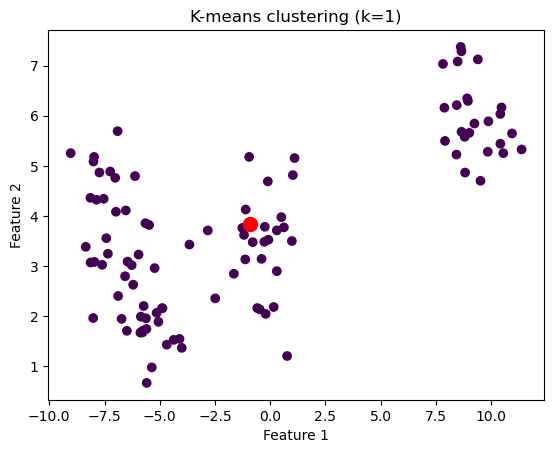

C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


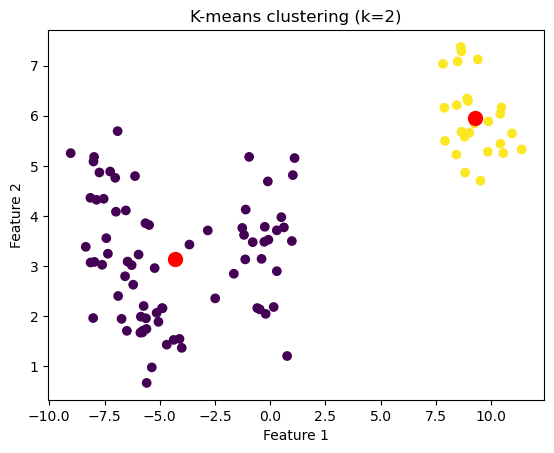

C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


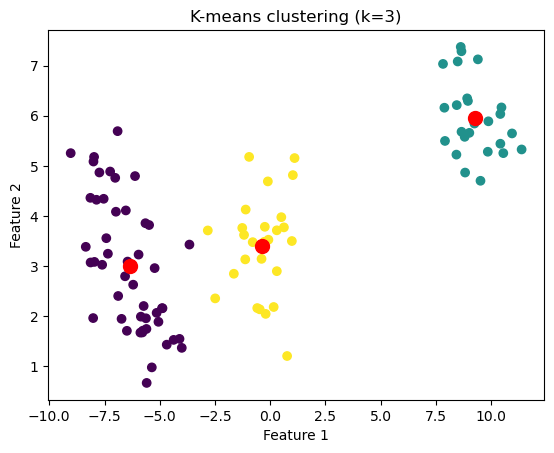

C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


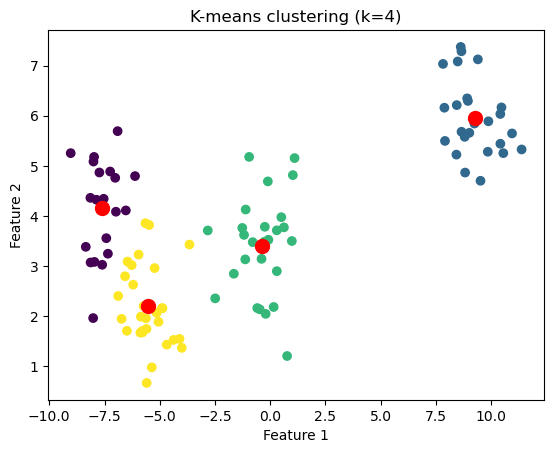

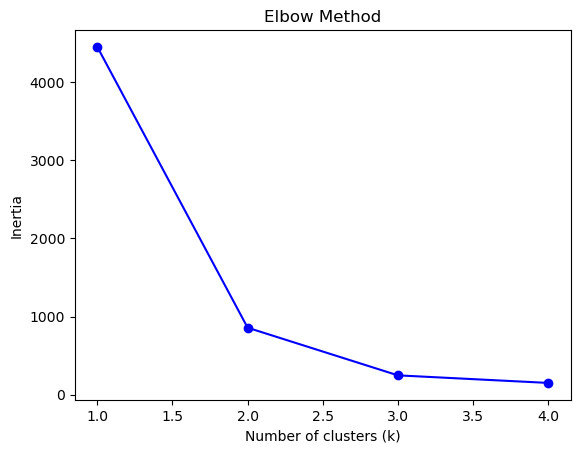

In [20]:

import matplotlib.pyplot as plt
 
# Create a range of values for k
k_range = range(1, 5)
 
# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []
 
# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
 
# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [21]:
Fin_model = KMeans(n_clusters=2, n_init = 25, random_state = 300)
Fin_model.fit(df_scaled)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [22]:
centeroid = pd.DataFrame(Fin_model.cluster_centers_,
                         columns = ['Children', 'Income'])
centeroid

,Children,Income
0,-0.357193,-0.412920
1,0.785458,0.908002


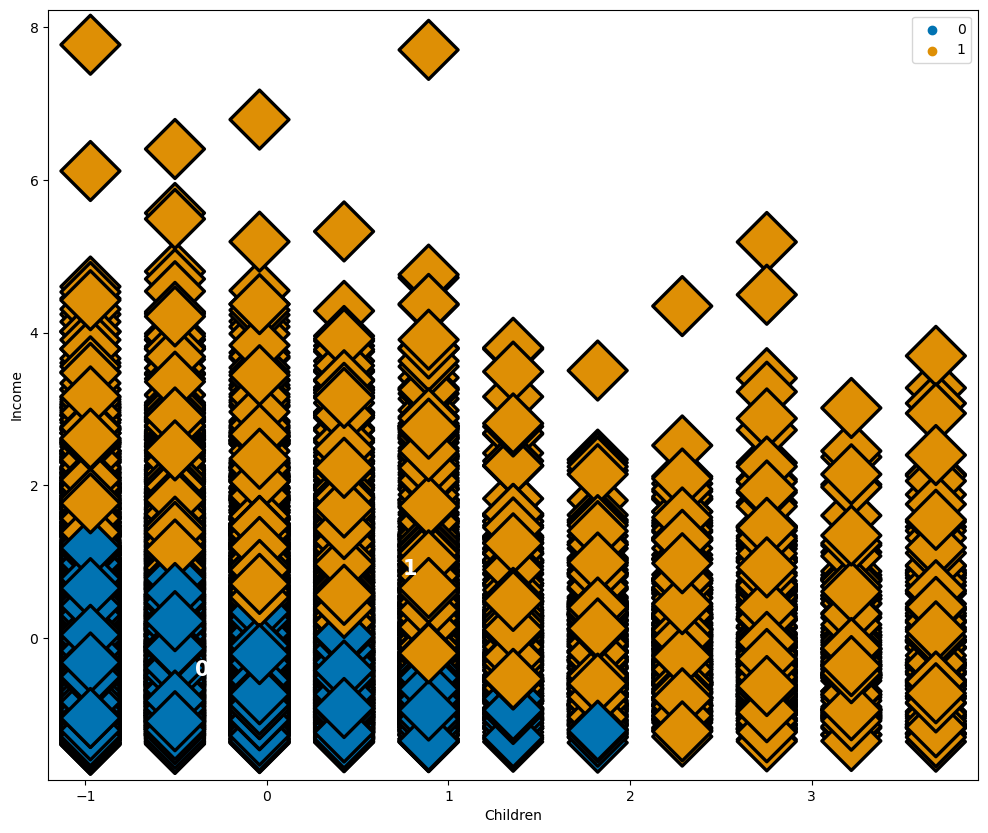

In [23]:
plt.figure(figsize=(12,10))

ax = sns.scatterplot(data = df_scaled,
                     x = 'Children',
                     y = 'Income',
                     hue = Fin_model.labels_,
                     palette = 'colorblind',
                     alpha = 0.9,
                     s = 200,
                     legend = True)

ax = sns.scatterplot(data = df_scaled,
                     x = 'Children',
                     y = 'Income',
                     hue = Fin_model.labels_,
                     palette = 'colorblind',
                     s = 900,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

for i in range(len(centeroid)):
                plt.text(x = centeroid.Children[i],
                         y = centeroid.Income[i],
                         s = i,
                         horizontalalignment='center',
                         verticalalignment='center',
                         size = 15,
                         weight = 'bold',
                         color = 'white')


                     

In [24]:
# The lowest SSE value
kmeans.inertia_


# Final locations of the centroid
kmeans.cluster_centers_





# The number of iterations required to converge
kmeans.n_iter_

3

In [39]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(df_scaled, Fin_model.labels_)
silhouette_score

0.4049114218546348

In [38]:
for n_clusters in range (2,5):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.3949615232328586)


C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.43776364066620416)


C:\Users\Viism\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.4005666910770718)


In [27]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Children  10000 non-null  int64  
 1   Income    10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB
None


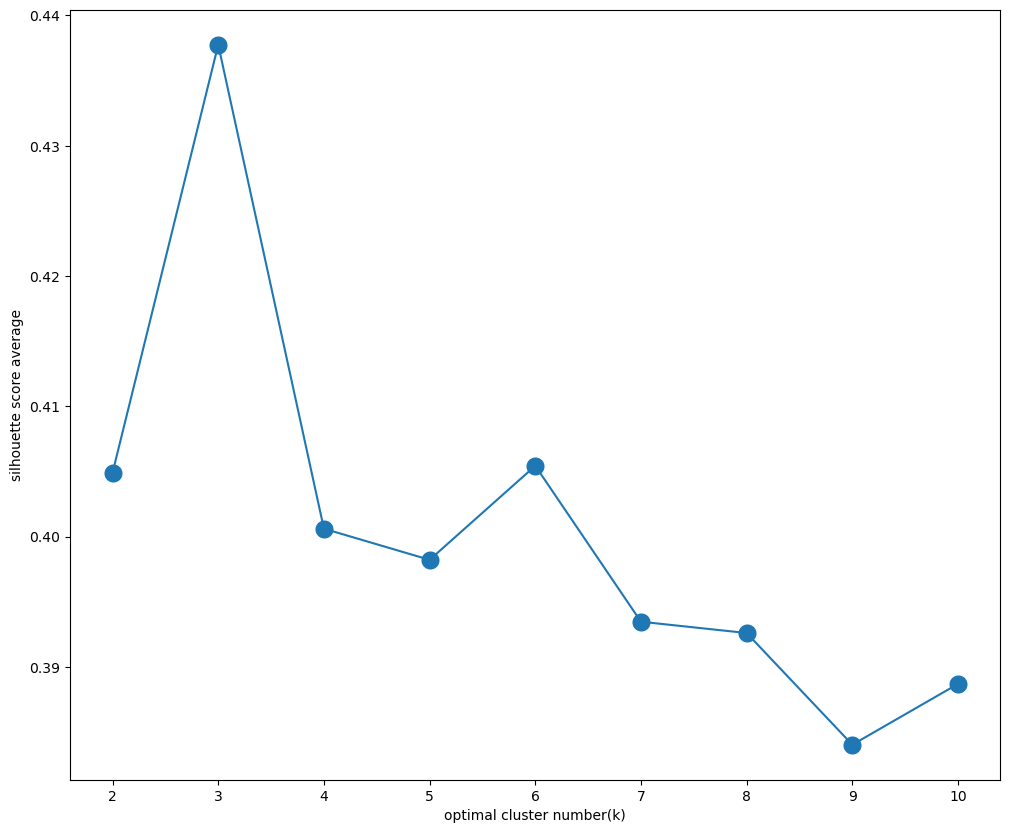

In [34]:
silhouette = []
for k in range(2,11):
    model = KMeans(n_clusters=k, n_init=25, random_state = 300)
    model.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, model.labels_))
    
silhouette_s = pd.Series(silhouette, index = range(2,11))

plt.figure(figsize=(12, 10))
ax =sns.lineplot(y=silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y=silhouette_s, x=silhouette_s.index, s=200)
ax = ax.set(xlabel = 'optimal cluster number(k)', 
            ylabel = 'silhouette score average')

In [35]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import accuracy_score, classification_report

C:\Users\Viism\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Viism\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


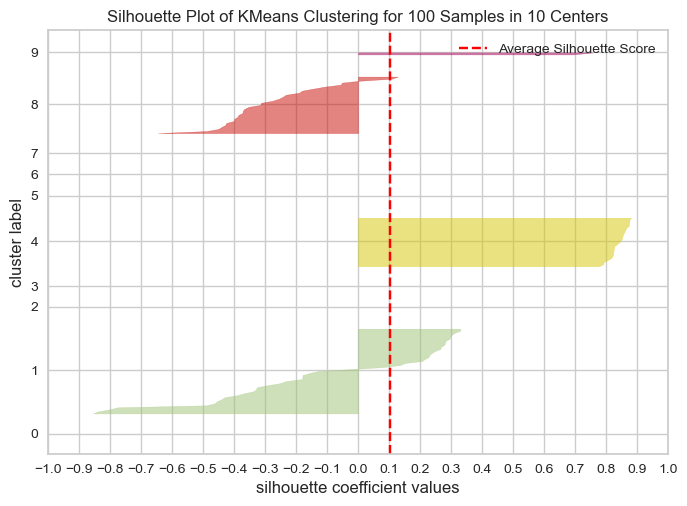

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 100 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
                                  
visualizer.fit(X)
visualizer.show()                                  

In [37]:
np.unique(Fin_model.labels_)

array([0, 1])